In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho2Bim/NaoSupervisionado/covid.csv',
                    sep=',', encoding='iso-8859-1')

In [4]:
df.head()

# Country,\nOther Total\nCases Total\nDeaths  New\nDeaths Total\nRecovered  \
0  1             USA   98,166,904     1,084,282          NaN       94,962,112   
1  2           India   44,587,307       528,629          NaN       44,019,095   
2  3          France   35,342,950       155,078          NaN       34,527,115   
3  4          Brazil   34,706,757       686,027          NaN       33,838,636   
4  5         Germany   33,312,373       149,948          NaN       32,315,200   

  Active\nCases Serious,\nCritical Tot Cases/\n1M pop Deaths/\n1M pop  \
0     2,120,510              2,970            293,206           3,239   
1        39,583                698             31,698             376   
2       660,757                869            538,892           2,365   
3       182,094              8,318            161,162           3,186   
4       847,225              1,406            397,126           1,788   

    Total\nTests Tests/\n1M pop     Population  
0  1,118,158,870      3,339,729    334,805,269  
1    894,416,853        635,857  1,406,631,776  
2    271,490,188      4,139,547     65,584,518  
3     63,776,166        296,146    215,353,593  
4    122,332,384      1,458,359     83,883,596

# Limpeza de Dados e Analise

In [ ]:
df_covid = df[['Country,\nOther', 'Total\nCases', 'Total\nDeaths', 'Population']]
df_covid.columns = df_covid.columns.str.replace('Country,\nOther','pais').str.replace('Total\nCases','total_casos').str.replace('Total\nDeaths','total_mortes').str.replace('Population','populacao')
df_covid.head()

pais total_casos total_mortes      populacao
0      USA  98,166,904    1,084,282    334,805,269
1    India  44,587,307      528,629  1,406,631,776
2   France  35,342,950      155,078     65,584,518
3   Brazil  34,706,757      686,027    215,353,593
4  Germany  33,312,373      149,948     83,883,596

In [ ]:
# verificando dados nulos
df_covid[df_covid.isna().any(axis=1)]

pais total_casos total_mortes populacao
219  Falkland Islands       1,886          NaN     3,539
221      Saint Helena       1,355          NaN     6,115
224  Diamond Princess         712           13       NaN
225              Niue          80          NaN     1,622
226      Vatican City          29          NaN       799
227            Tuvalu          20          NaN    12,066
229        MS Zaandam           9            2       NaN

In [ ]:
# excluindo nulos
df_covid = df_covid.dropna(axis=0)

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 228
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pais          223 non-null    object
 1   total_casos   223 non-null    object
 2   total_mortes  223 non-null    object
 3   populacao     223 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB


In [ ]:
# tratando tipos pra transformação de dados
df_covid['total_casos']=df_covid['total_casos'].str.replace(',','')
df_covid['total_mortes']=df_covid['total_mortes'].str.replace(',','')
df_covid['populacao']=df_covid['populacao'].str.replace(',','')

# df_covid[df_covid['total_casos'] == '98,166,904']

In [ ]:
df_covid = df_covid.astype({'total_casos': int, 'total_mortes': int, 'populacao': int})
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 228
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pais          223 non-null    object
 1   total_casos   223 non-null    int64 
 2   total_mortes  223 non-null    int64 
 3   populacao     223 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.7+ KB


In [ ]:
df_covid.head(30)

pais  total_casos  total_mortes   populacao
0           USA     98166904       1084282   334805269
1         India     44587307        528629  1406631776
2        France     35342950        155078    65584518
3        Brazil     34706757        686027   215353593
4       Germany     33312373        149948    83883596
5      S. Korea     24769101         28406    51329899
6            UK     23621952        189919    68497907
7         Italy     22432803        177054    60262770
8         Japan     21229216         44678   125584838
9        Russia     20948470        387163   145805947
10       Turkey     16873793        101139    85561976
11        Spain     13412263        114084    46719142
12      Vietnam     11477886         43148    98953541
13    Australia     10209239         14984    26068792
14    Argentina      9708420        129897    46010234
15  Netherlands      8422336         22643    17211447
16         Iran      7548320        144421    86022837
17       Mexico      7084488        330065   131562772
18    Indonesia      6429767        158093   279134505
19       Taiwan      6417941         11003    23888595
20     Colombia      6307372        141794    51512762
21       Poland      6289672        117539    37739785
22     Portugal      5490639         25024    10140570
23      Ukraine      5177217        109206    43192122
24      Austria      5118512         20738     9066710
25       Greece      4920192         33111    10316637
26     Malaysia      4838872         36369    33181072
27         DPRK      4772813            74    25990679
28     Thailand      4681309         32767    70078203
29       Israel      4661096         11698     9326000

In [ ]:
# normatizando dados
df_covid['%casos_popul'] = (df_covid['total_casos'] / df_covid['populacao'] * 100).round(2)
df_covid['%mortes_popul'] = (df_covid['total_mortes'] / df_covid['populacao'] * 100).round(2)
df_covid

pais  total_casos  total_mortes   populacao  \
0                      USA     98166904       1084282   334805269   
1                    India     44587307        528629  1406631776   
2                   France     35342950        155078    65584518   
3                   Brazil     34706757        686027   215353593   
4                  Germany     33312373        149948    83883596   
..                     ...          ...           ...         ...   
218  Saint Pierre Miquelon         3188             1        5759   
220             Montserrat         1396             8        4965   
222                  Macao          793             6      667490   
223      Wallis and Futuna          761             7       10982   
228         Western Sahara           10             1      626161   

     %casos_popul  %mortes_popul  
0           29.32           0.32  
1            3.17           0.04  
2           53.89           0.24  
3           16.12           0.32  
4           39.71           0.18  
..            ...            ...  
218         55.36           0.02  
220         28.12           0.16  
222          0.12           0.00  
223          6.93           0.06  
228          0.00           0.00  

[223 rows x 6 columns]

In [ ]:
df_covid.shape

(223, 6)

In [ ]:
df_covid.isnull().sum()

pais             0
total_casos      0
total_mortes     0
populacao        0
%casos_popul     0
%mortes_popul    0
dtype: int64

In [ ]:
df_covid.describe()

total_casos  total_mortes     populacao  %casos_popul  %mortes_popul
count  2.230000e+02  2.230000e+02  2.230000e+02    223.000000     223.000000
mean   2.790891e+06  2.935910e+04  3.562740e+07     17.987668       0.119955
std    8.903890e+06  1.026356e+05  1.403795e+08     18.200675       0.124750
min    1.000000e+01  1.000000e+00  4.965000e+03      0.000000       0.000000
25%    3.164300e+04  2.190000e+02  6.270555e+05      1.690000       0.020000
50%    2.216180e+05  2.221000e+03  6.550389e+06     11.990000       0.080000
75%    1.278938e+06  1.415250e+04  2.493964e+07     29.315000       0.195000
max    9.816690e+07  1.084282e+06  1.448471e+09     70.400000       0.640000

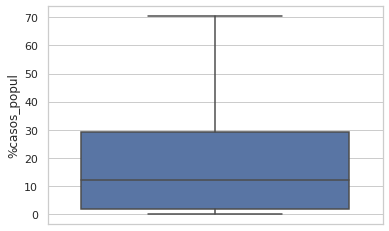

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(y=df_covid["%casos_popul"])

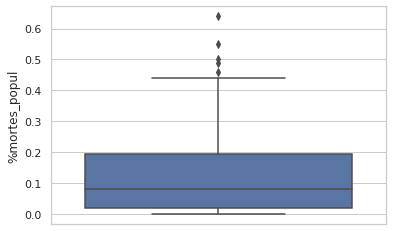

In [ ]:
ax = sns.boxplot(y=df_covid["%mortes_popul"])

In [ ]:
# Identificando e limpando Outliers
df_covid = df_covid[df_covid['%casos_popul'] < 30 ]
df_covid = df_covid[df_covid['%mortes_popul'] < 0.2 ]
df_covid.describe()

total_casos   total_mortes     populacao  %casos_popul  %mortes_popul
count  1.370000e+02     137.000000  1.370000e+02    137.000000     137.000000
mean   1.328209e+06   13183.605839  4.550406e+07      7.187518       0.051168
std    4.629314e+06   50101.818420  1.744734e+08      8.559653       0.054369
min    1.000000e+01       1.000000  4.965000e+03      0.000000       0.000000
25%    2.154400e+04     189.000000  1.369429e+06      0.450000       0.010000
50%    1.031310e+05    1466.000000  9.432800e+06      3.110000       0.030000
75%    6.707630e+05    7118.000000  2.926699e+07     11.030000       0.090000
max    4.458731e+07  528629.000000  1.448471e+09     29.950000       0.190000

In [ ]:
df_covid.head(30)

pais  total_casos  total_mortes   populacao  %casos_popul  \
1          India     44587307        528629  1406631776          3.17   
8          Japan     21229216         44678   125584838         16.90   
10        Turkey     16873793        101139    85561976         19.72   
12       Vietnam     11477886         43148    98953541         11.60   
16          Iran      7548320        144421    86022837          8.77   
18     Indonesia      6429767        158093   279134505          2.30   
19        Taiwan      6417941         11003    23888595         26.87   
26      Malaysia      4838872         36369    33181072         14.58   
27          DPRK      4772813            74    25990679         18.36   
28      Thailand      4681309         32767    70078203          6.68   
32        Canada      4233468         44992    38388419         11.03   
36  South Africa      4018769        102185    60756135          6.61   
37   Philippines      3945566         62916   112508994          3.51   
41          Iraq      2459982         25355    42164965          5.83   
44    Bangladesh      2024489         29362   167885689          1.21   
49     Hong Kong      1761381         10153     7604299         23.16   
50        Jordan      1746997         14122    10300869         16.96   
52      Pakistan      1572598         30616   229488994          0.69   
53        Norway      1462318          4098     5511370         26.53   
54    Kazakhstan      1393468         13690    19205043          7.26   
55       Finland      1292940          5981     5554960         23.28   
56       Morocco      1264935         16278    37772756          3.35   
60       Lebanon      1215511         10674     6684849         18.18   
63     Guatemala      1123465         19789    18584039          6.05   
64          Cuba      1111179          8530    11305652          9.83   
65       Bolivia      1108195         22234    11992656          9.24   
66    Costa Rica      1072807          8913     5182354         20.70   
67           UAE      1027031          2345    10081785         10.19   
69         Nepal       999712         12018    30225582          3.31   
70       Belarus       994037          7118     9432800         10.54   

    %mortes_popul  
1            0.04  
8            0.04  
10           0.12  
12           0.04  
16           0.17  
18           0.06  
19           0.05  
26           0.11  
27           0.00  
28           0.05  
32           0.12  
36           0.17  
37           0.06  
41           0.06  
44           0.02  
49           0.13  
50           0.14  
52           0.01  
53           0.07  
54           0.07  
55           0.11  
56           0.04  
60           0.16  
63           0.11  
64           0.08  
65           0.19  
66           0.17  
67           0.02  
69           0.04  
70           0.08

In [ ]:
df_covid.shape

(137, 6)

In [ ]:
# Salvando o arquivo limpo
df_covid.to_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho2Bim/NaoSupervisionado/covid_limpo.csv', index=False)